# DS_C5_S6

In [25]:
import pandas as pd
df = pd.read_csv('DS1_C5_S5_Hotel Dataset.csv')

num_col = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_col = df.select_dtypes(include=['object']).columns.tolist()

# Summary of cleaning steps completed
print(f"Numerical Columns: {num_col}\n")
print(f"Categorical Columns: {cat_col}\n")

# Display the cleaned dataset's first few rows
df.head()

Numerical Columns: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

Categorical Columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015


# Task 1: Customer Satisfaction

1. What is the distribution of the number and type of special request made by guests?
2. Is there any relation between special requests made by customers and the average daily rate? Additionally, explore customer preferences and expections for different room type.

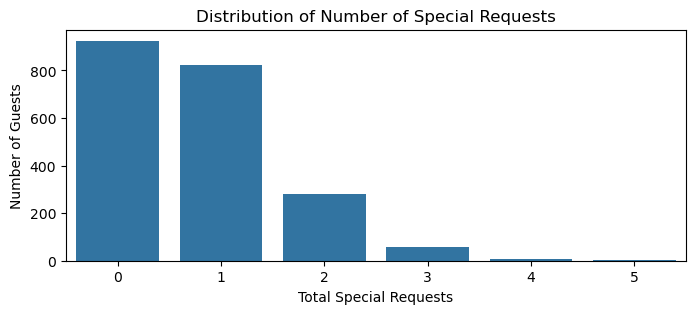

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 3))
sns.countplot(x='total_of_special_requests', data=df)
plt.title('Distribution of Number of Special Requests')
plt.xlabel('Total Special Requests')
plt.ylabel('Number of Guests')
plt.show()

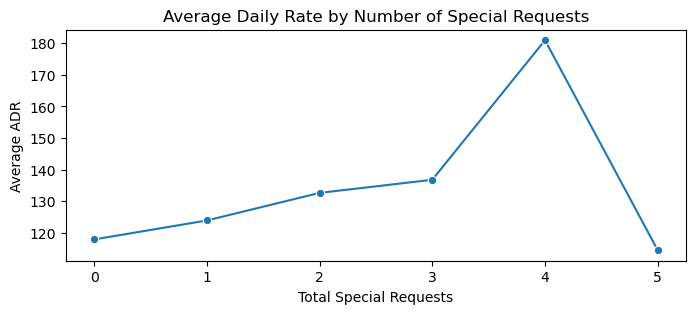

In [27]:
# Analyzing relationship between special requests and ADR
special_request_adr = df.groupby('total_of_special_requests')['adr'].mean().reset_index()
special_request_adr.columns = ['total_special_requests', 'average_adr']

# Plotting ADR against special requests
plt.figure(figsize=(8, 3))
sns.lineplot(x='total_special_requests', y='average_adr', data=special_request_adr, marker='o')
plt.title('Average Daily Rate by Number of Special Requests')
plt.xlabel('Total Special Requests')
plt.ylabel('Average ADR')
plt.show()

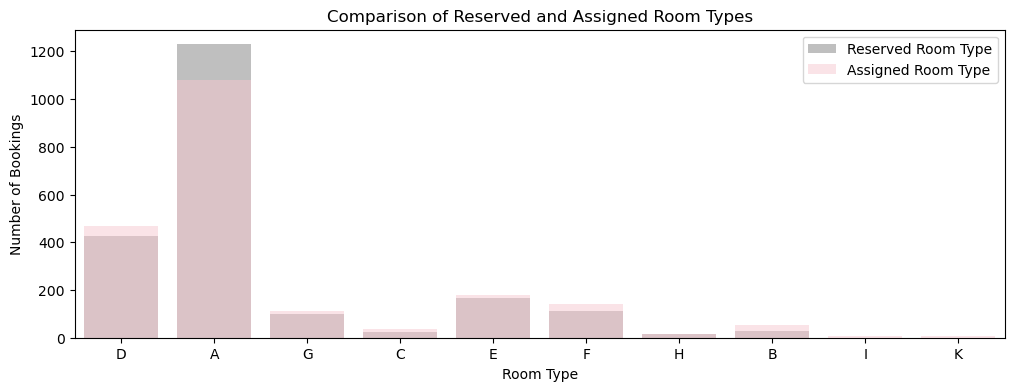

In [15]:
# Distribution of reserved vs assigned room types
plt.figure(figsize=(12, 4))
sns.countplot(x='reserved_room_type', data=df, color='grey', alpha=0.5, label='Reserved Room Type')
sns.countplot(x='assigned_room_type', data=df, color='pink', alpha=0.5, label='Assigned Room Type')
plt.title('Comparison of Reserved and Assigned Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.legend()
plt.show()

# Summary of Task 1
- Distribution of Special Requests: This will show the count of special requests guests typically made by them.
- Special Requests and ADR: Examining if a higher number of requests correlates with a higher ADR, possibly indicating willingness to pay more
- Room Type Preferences: After Analyzing discrepancies between reserved and assigned rooms if guests receive their preferred room type, impacting satisfaction.

# Task 2: Marketing and Sales Optimization

1. Which marketing channels and market segments contribute the most to successful bookings?
2. Which amenities or service have the highest impact on the average daily rate (ADR)?
3. What is the distribution of bookings across various distribution channels?

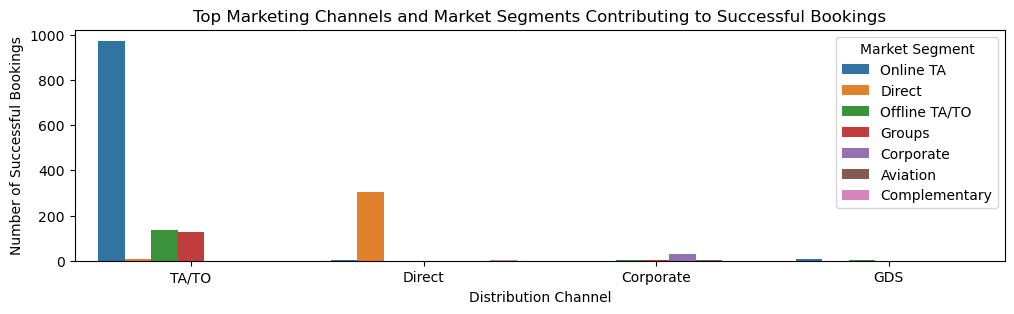

In [19]:
# Filter for successful bookings (not canceled)
successful_bookings = df[df['is_canceled'] == 0]
channel_segment_success = successful_bookings.groupby(['distribution_channel', 'market_segment']).size().reset_index(name='booking_count')
channel_segment_success = channel_segment_success.sort_values(by='booking_count', ascending=False) # Sort by booking count to find top contributors

plt.figure(figsize=(12, 3))
sns.barplot(x='distribution_channel', y='booking_count', hue='market_segment', data=channel_segment_success)
plt.title('Top Marketing Channels and Market Segments Contributing to Successful Bookings')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Successful Bookings')
plt.legend(title='Market Segment')
plt.show()

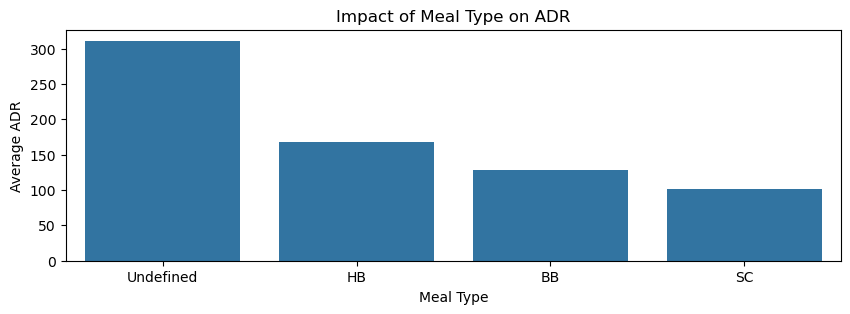

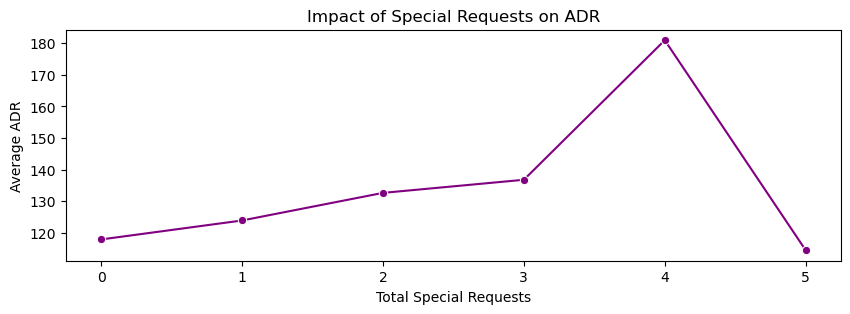

In [21]:
# Group by meal type and calculate average ADR
adr_by_meal = df.groupby('meal')['adr'].mean().reset_index().sort_values(by='adr', ascending=False)
plt.figure(figsize=(10, 3))
sns.barplot(x='meal', y='adr', data=adr_by_meal)
plt.title('Impact of Meal Type on ADR')
plt.xlabel('Meal Type')
plt.ylabel('Average ADR')
plt.show()

# Group by special requests to see if they influence ADR
adr_by_special_requests = df.groupby('total_of_special_requests')['adr'].mean().reset_index()
plt.figure(figsize=(10, 3))
sns.lineplot(x='total_of_special_requests', y='adr', data=adr_by_special_requests, marker='o', color='purple')
plt.title('Impact of Special Requests on ADR')
plt.xlabel('Total Special Requests')
plt.ylabel('Average ADR')
plt.show()

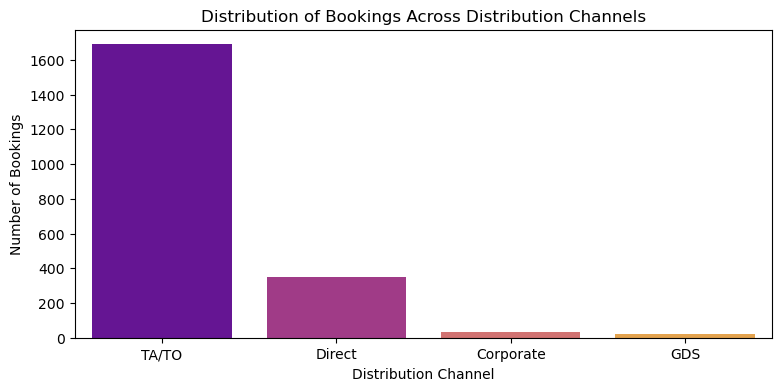

In [24]:
channel_distribution = df['distribution_channel'].value_counts().reset_index()
channel_distribution.columns = ['distribution_channel', 'booking_count']

plt.figure(figsize=(9, 4))
sns.barplot(x='distribution_channel', y='booking_count', hue='distribution_channel', data=channel_distribution, palette='plasma', legend=False)
plt.title('Distribution of Bookings Across Distribution Channels')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.show()

# Summary of Task 2
- Successful Bookings by Channel and Segment: Analyze which combination of distribution_channel and market_segment leads to the highest booking count.
- Impact on ADR: Identify how different meal types, special requests, and other services influence ADR to optimize offerings.
- Booking Distribution by Channel: Visualize the distribution channels to determine where most bookings originate.